In [1]:
import numpy as np # mengimport library numpy untuk komputasi numerik
import pandas as pd # mengimport library pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt # mengimport matplotlib untuk membuat membuat grafik sebagai visualisasi data
from collections import defaultdict # mengimport defaultdict dari modul collections untuk membuat dictinary dengan nilai default otomatis

In [2]:
data = pd.read_csv('diabetes.csv') # menyimpan proses baca data dari file diabetes.csv dalam variable bernama data
print(data.head()) # menampilkan lima baris pertama dari dataset

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
states = list(range(0, 13))  # membuat daftar state yang mewakili gula darah dari 80 hingga 200 mg/dL
actions = [10, 20, 30, 40, 50]  # daftar dosis obat yang diberikan dengan satuan yang disesuaikan
gamma = 0.9  # menentukan seberapa jauh dampak reward masa depan terhadap keputusan saat ini
alpha = 0.1  # menetapkan learning rate untuk memperbarui nilai q 
epsilon = 0.1  # parameter yang kebijakan epsilon-greedy yang menentukan eksplorasi vs eksploitasi

In [4]:
def get_reward(glucose): # mendefinisikan fungsi untuk menghitung reward berdasarkan level gula darah yang berisikan tentang target gula darah yang dianggap sehat
    # dengan return nilai positif (1) apabila lever gula darah sehat dan negative (-1) apabila gula darah diluar rentang sehat
    target_glucose_range = (80, 140)
    if target_glucose_range[0] <= glucose <= target_glucose_range[1]:
        return 1  
    else:
        return -1  # 

Q = defaultdict(lambda: np.zeros(len(actions))) # membuat dictionary q dengan nilai default berupa array nol sebesar jumlah aksi

def epsilon_greedy_policy(state, epsilon):# Fungsi yang mendefinisikan pemilihan tindakan berdasarkan kebijakan epsilon-greedy dengan cara membandingkan nilai acak
    # dengan epsilon yang bertujuan untuk menentukan kembalian nilai apakah nilai yang dikembalikan tindakan acak dari daftar tindakan atau tindakan dengan nilai q tertinggi
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        action_values = Q[state]
        return actions[np.argmax(action_values)]


In [5]:
def sarsa(data, num_episodes): # fungsi sarsa diisikan dengan parameter data dan num_episodes yang berisikan tentang :

    num_patients = len(data) # menghitung jumlah pasien dalam dataset
    for episode in range(num_episodes): # perulangan dengan tujuan iterasi setiap episode
        # Memilih pasien secara berurut berdasarkan indeks episode
        patient_index = episode % num_patients
        patient = data.iloc[patient_index]
        
        state = int((patient['Glucose'] - 80) / 10) # menghitung state awwal dari level gula darah pasien
        action = epsilon_greedy_policy(state, epsilon) # memilih tindakan menggunakan kebijakan epsilon - greedy

        for t in range(10):  # Batas maksimal iterasi per episode
            # Mendapatkan reward dari kondisi gula darah saat ini
            glucose = patient['Glucose'] - action  # Misalnya, mengurangi gula darah berdasarkan dosis
            reward = get_reward(glucose)

            # Transisi ke kondisi baru yang 
            next_glucose_level = max(80, min(200, glucose)) # memastikan level gula berada dalam batas aman sesuai dengan yang sudah dtentukan
            next_state = int((next_glucose_level - 80) / 10) #  menghitung state berdasarkan lever gula yang diperbarui
            next_action = epsilon_greedy_policy(next_state, epsilon) # memilih tindakan berikutnya menggunakan kebijakan epsilon-policy

            # Update fungsi Q menggunakan update rule SARSA
            Q[state][actions.index(action)] += alpha * (
                reward + gamma * Q[next_state][actions.index(next_action)] - Q[state][actions.index(action)]
            )

            # Transisi ke state dan action berikutnya
            state = next_state
            action = next_action

# Menjalankan algoritma SARSA
sarsa(data, num_episodes=5000)

Kebijakan Optimal:
{0: 10, 1: 10, 2: 10, 3: 30, 4: 20, 5: 50, 6: 30, 7: 50, 8: 50, 9: 50, 10: 40, 11: 30, 12: 10}


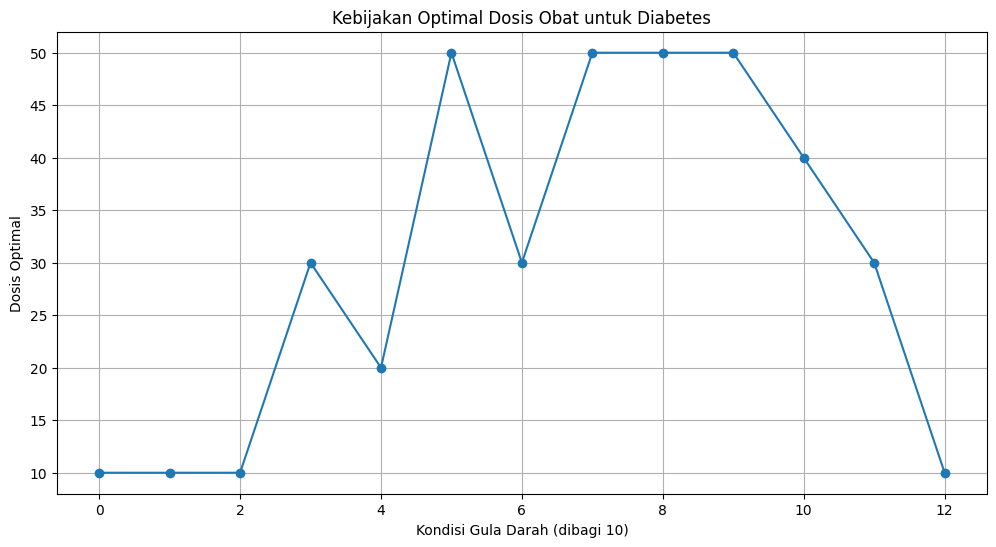

In [6]:
optimal_policy = {state: actions[np.argmax(Q[state])] for state in states} # Membuat dictionary yang berisi kebijakan optimal berdasarkan nilai Q tertinggi untuk setiap state
print('Kebijakan Optimal:') # cetak pesan "Kebijakn Optimal"
print(optimal_policy) # mencetak kebijakan optimal yang ditemukan

# Visualisasi kebijakan optimal
state_values = list(optimal_policy.keys()) # visualisasi kebijakan optimal state dalam sumbu x
optimal_doses = list(optimal_policy.values()) # visualisasi kebijakan optimal "dosis optimal dalam sumbu y

plt.figure(figsize=(12, 6)) # membuat plot dengan ukuran 12x6
plt.plot(state_values, optimal_doses, marker='o', linestyle='-')
plt.title('Kebijakan Optimal Dosis Obat untuk Diabetes')
plt.xlabel('Kondisi Gula Darah (dibagi 10)')
plt.ylabel('Dosis Optimal')
plt.grid() # menambahkan grid pada grafik
plt.show() # menampilkan grafik